In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

# Use the citipy module to determine city based on 
# latitude and longitude.
from citipy import citipy

# Import the time library and the datetime module 
# from the datetime library 
import time
from datetime import datetime


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# NOTE
# You can only unzip a zipped tuple once before it is removed from 
# the computer's memory. Make sure you unzip the latitudes and 
# longitudes into the coordinates list before moving on.

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-33.81530546039522 -28.32075348328911
17.2358867042922 14.290983650680147
-57.71749881894575 103.50681998387006
-75.11844845477816 78.8161103307632
46.00482532291065 101.55818022581559
73.12514975160323 -70.1137238533556
19.2720101930733 93.91872573525222
-15.644050464117413 148.56306825571215
36.47856274294615 -49.98766676974088
86.44176687456618 -49.028675158306044
-37.26815961737802 -37.66294928834833
27.34790528655826 105.19185854622606
77.81965631812207 43.80089924977037
10.907137722946956 99.51067298675792
-26.471161592251875 127.41058102087675
-35.48471757772223 -86.40844844409015
44.766001835921486 -139.78716629623938
65.40770280655767 10.886904971973337
-8.012683246996446 -118.69082393224483
-87.79508482212127 -165.146496062337
-57.34270693739768 -147.32668974822343
-80.06493110342316 90.76635994244845
56.10548706033583 -177.17569430505716
56.90032726421677 48.66571350947254
-70.4451837690842 -27.88140474695703
-37.10998540356035 159.8579240723289
-20.57134876706256 7.21899876

65.79800564526005 102.67154023979259
63.22814708542228 160.08692974534773
-72.79725583882589 6.96836236632376
-80.99852751060116 -140.552026365304
-30.951829571236097 149.34679945707478
69.91992096061506 107.22126121878051
61.43369753254066 -97.92587580542462
-3.6951831072640573 -59.68182285324596
-43.7131785188327 -176.23022062224388
-4.605954181688631 101.78554496380997
47.85696219696021 -56.10424473389959
6.71504785864785 143.93663116026323
-7.936786775786331 97.29337165830952
11.161857069636213 91.34027373943991
58.72232739731294 -68.88776078204114
-86.82347667578314 -112.70832363210748
-20.882421316697545 -76.02630458331546
-34.24011795643463 -52.987821871474566
4.729886992193826 106.53872150750783
-18.437192879951013 176.35223305524414
20.624012223113766 -162.45270892481523
63.77038569907606 128.6290906300478
-77.95882272710448 -127.13654919751075
-50.62924174979761 -23.869271044833397
25.91240216548485 116.50503283566695
-70.99105258650658 93.91465199504921
20.404368302257907 -5

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [7]:
# We create the for loop with the enumerate() method and reference the index and the city in the list.

# In the conditional statement, we check if the remainder of the index 
# divided by 50...
###### "%" = Modulus
# ... is equal to 0 and if the index is greater than or equal to 50. 
# If the statement is true, then the set_count 
###### ?????? and the record_count are incremented by 1.


# Inside the conditional statement, we create the URL endpoint for each city, as before. However, we are removing the blank spaces in the city name and concatenating the city name with, city.replace(" ","+"). This will find the corresponding weather data for the city instead of finding the weather data for the first part of the city name.
# Also, we add a print statement that tells us the record count and set count, and the city that is being processed.
# Then we add one to the record count before the next city is processed.

In [8]:
# # Create an empty list to hold the weather data.
# city_data = []
# # Print the beginning of the logging.
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# # Create counters.
# record_count = 1
# set_count = 1

# # Loop through all the cities in the list.
# for i, city in enumerate(cities):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         ### Why is "record_count = 1" here? =1 above, +=1 below.
#         ### How is it incrementing? Shouldn't it reset to 1 in each loop?
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + city.replace(" ","+")

#     # Log the URL, record, and set numbers and the city.
#     print(f"Processing Record {record_count} of Set {set_count} | {city}")
#     # Add 1 to the record count.
#     record_count += 1
    
# # Run an API request for each of the cities.
#     try:
#         # Parse the JSON and retrieve data.
#         city_weather = requests.get(city_url).json()
#         # Parse out the needed data.
#         city_lat = city_weather["coord"]["lat"]
#         city_lng = city_weather["coord"]["lon"]
#         city_max_temp = city_weather["main"]["temp_max"]
#         city_humidity = city_weather["main"]["humidity"]
#         city_clouds = city_weather["clouds"]["all"]
#         city_wind = city_weather["wind"]["speed"]
#         city_country = city_weather["sys"]["country"]
#         # Convert the date to ISO standard.
#         city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
#         # Append the city information into city_data list.
#         city_data.append({"City": city.title(),
#                           "Lat": city_lat,
#                           "Lng": city_lng,
#                           "Max Temp": city_max_temp,
#                           "Humidity": city_humidity,
#                           "Cloudiness": city_clouds,
#                           "Wind Speed": city_wind,
#                           "Country": city_country,
#                           "Date": city_date})

# # If an error is experienced, skip the city.
#     except:
#         print("City not found. Skipping...")
#         pass

# # Indicate that Data Loading is complete.
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | bilma
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | hovd
Processing Record 5 of Set 1 | clyde river
Processing Record 6 of Set 1 | thayetmyo
Processing Record 7 of Set 1 | cairns
Processing Record 8 of Set 1 | torbay
Processing Record 9 of Set 1 | upernavik
Processing Record 10 of Set 1 | laguna
Processing Record 11 of Set 1 | bijie
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | bang saphan
Processing Record 14 of Set 1 | yulara
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | sitka
Processing Record 17 of Set 1 | rorvik
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | provideniya
Processing Record 21 of Set 1 | sovetskiy
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of S

Processing Record 39 of Set 4 | sur
Processing Record 40 of Set 4 | east london
Processing Record 41 of Set 4 | khasan
Processing Record 42 of Set 4 | barranca
Processing Record 43 of Set 4 | kanbe
Processing Record 44 of Set 4 | kenai
Processing Record 45 of Set 4 | ankpa
Processing Record 46 of Set 4 | amapa
Processing Record 47 of Set 4 | sainte-rose
Processing Record 48 of Set 4 | mayo
Processing Record 49 of Set 4 | saint-joseph
Processing Record 50 of Set 4 | kasongo
Processing Record 1 of Set 5 | vila
Processing Record 2 of Set 5 | marquette
Processing Record 3 of Set 5 | mount isa
Processing Record 4 of Set 5 | high level
Processing Record 5 of Set 5 | ornskoldsvik
Processing Record 6 of Set 5 | tecpan
Processing Record 7 of Set 5 | lugo
Processing Record 8 of Set 5 | lyubashivka
Processing Record 9 of Set 5 | quimperle
Processing Record 10 of Set 5 | puerto escondido
Processing Record 11 of Set 5 | iralaya
Processing Record 12 of Set 5 | portobelo
Processing Record 13 of Set 5

Processing Record 29 of Set 8 | goderich
Processing Record 30 of Set 8 | dingle
Processing Record 31 of Set 8 | molteno
Processing Record 32 of Set 8 | westport
Processing Record 33 of Set 8 | sola
Processing Record 34 of Set 8 | camocim
Processing Record 35 of Set 8 | cidreira
Processing Record 36 of Set 8 | inhambane
Processing Record 37 of Set 8 | lazaro cardenas
Processing Record 38 of Set 8 | labuan
Processing Record 39 of Set 8 | asau
Processing Record 40 of Set 8 | apollonia
Processing Record 41 of Set 8 | sokolo
Processing Record 42 of Set 8 | chaa-khol
City not found. Skipping...
Processing Record 43 of Set 8 | punta alta
Processing Record 44 of Set 8 | ca mau
Processing Record 45 of Set 8 | eydhafushi
Processing Record 46 of Set 8 | kavaratti
Processing Record 47 of Set 8 | verkhoyansk
Processing Record 48 of Set 8 | vage
Processing Record 49 of Set 8 | sistranda
Processing Record 50 of Set 8 | leon
Processing Record 1 of Set 9 | rocha
Processing Record 2 of Set 9 | merauke
P

Processing Record 18 of Set 12 | mindelo
Processing Record 19 of Set 12 | aktau
Processing Record 20 of Set 12 | oistins
Processing Record 21 of Set 12 | coquimbo
Processing Record 22 of Set 12 | ganzhou
Processing Record 23 of Set 12 | otradnoye
Processing Record 24 of Set 12 | maldonado
Processing Record 25 of Set 12 | bandundu
Processing Record 26 of Set 12 | umm kaddadah
Processing Record 27 of Set 12 | dandong
Processing Record 28 of Set 12 | mukhtolovo
Processing Record 29 of Set 12 | abu dhabi
Processing Record 30 of Set 12 | dauriya
Processing Record 31 of Set 12 | umuarama
Processing Record 32 of Set 12 | yertsevo
Processing Record 33 of Set 12 | idil
Processing Record 34 of Set 12 | kazanskaya
Processing Record 35 of Set 12 | samfya
Processing Record 36 of Set 12 | emmett
Processing Record 37 of Set 12 | havre-saint-pierre
Processing Record 38 of Set 12 | dwarka
Processing Record 39 of Set 12 | matamoros
Processing Record 40 of Set 12 | gizo
Processing Record 41 of Set 12 | k

In [22]:
len(city_data)

573

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial Do Cabo,-22.9661,-42.0278,72.34,84,52,15.86,BR,2022-07-17 23:13:32
1,Bilma,18.6853,12.9164,88.52,36,31,3.67,NE,2022-07-17 23:08:42
2,Busselton,-33.6500,115.3333,54.12,90,95,14.45,AU,2022-07-17 23:13:33
3,Hovd,48.0056,91.6419,63.72,44,10,9.26,MN,2022-07-17 23:13:33
4,Clyde River,70.4692,-68.5914,39.51,75,6,6.85,CA,2022-07-17 23:13:34
5,Thayetmyo,19.3167,95.1833,75.61,96,82,3.42,MM,2022-07-17 23:13:34
6,Cairns,-16.9167,145.7667,74.10,74,32,9.22,AU,2022-07-17 23:13:35
7,Torbay,47.6666,-52.7314,67.28,75,100,12.28,CA,2022-07-17 23:13:35
8,Upernavik,72.7868,-56.1549,40.42,92,26,13.69,GL,2022-07-17 23:13:36
9,Laguna,38.4210,-121.4238,108.75,17,0,13.80,US,2022-07-17 23:13:36


In [24]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [25]:
city_data_df = city_data_df[new_column_order]

In [26]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Arraial Do Cabo,BR,2022-07-17 23:13:32,-22.9661,-42.0278,72.34,84,52,15.86
1,Bilma,NE,2022-07-17 23:08:42,18.6853,12.9164,88.52,36,31,3.67
2,Busselton,AU,2022-07-17 23:13:33,-33.6500,115.3333,54.12,90,95,14.45
3,Hovd,MN,2022-07-17 23:13:33,48.0056,91.6419,63.72,44,10,9.26
4,Clyde River,CA,2022-07-17 23:13:34,70.4692,-68.5914,39.51,75,6,6.85


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

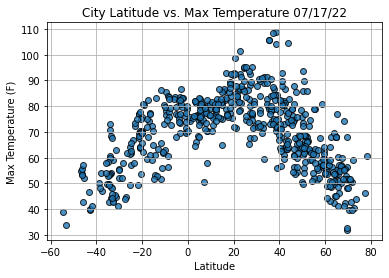

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

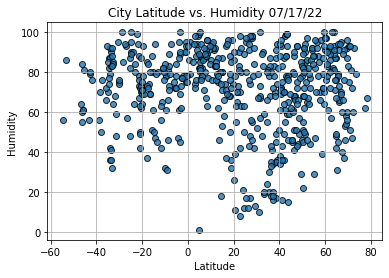

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

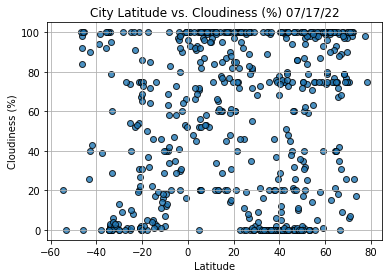

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

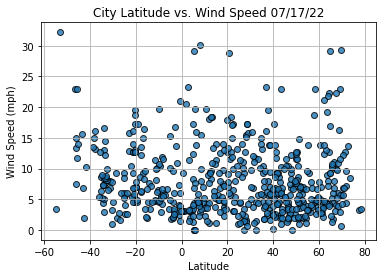

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# (I hope we eventually learn how to parse the "fig.png" names 
# so we can automatically input the x and y axes into them.)

In [53]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
############ I don't understand the text_coordinates piece of this.

In [54]:
index13 = city_data_df.loc[13]

In [55]:
index13

City                         Lebu
Country                        CL
Date          2022-07-17 23:13:38
Lat                      -37.6167
Lng                        -73.65
Max Temp                     47.1
Humidity                       76
Cloudiness                     39
Wind Speed                   13.2
Name: 13, dtype: object

In [56]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4       True
       ...  
568     True
569     True
570    False
571    False
572     True
Name: Lat, Length: 573, dtype: bool

In [57]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Bilma,NE,2022-07-17 23:08:42,18.6853,12.9164,88.52,36,31,3.67
3,Hovd,MN,2022-07-17 23:13:33,48.0056,91.6419,63.72,44,10,9.26
4,Clyde River,CA,2022-07-17 23:13:34,70.4692,-68.5914,39.51,75,6,6.85
5,Thayetmyo,MM,2022-07-17 23:13:34,19.3167,95.1833,75.61,96,82,3.42
7,Torbay,CA,2022-07-17 23:13:35,47.6666,-52.7314,67.28,75,100,12.28


In [58]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

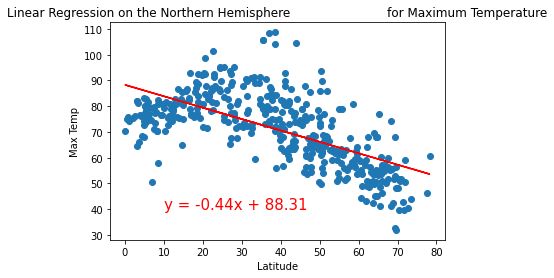

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

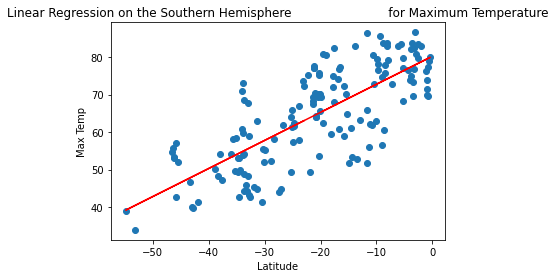

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

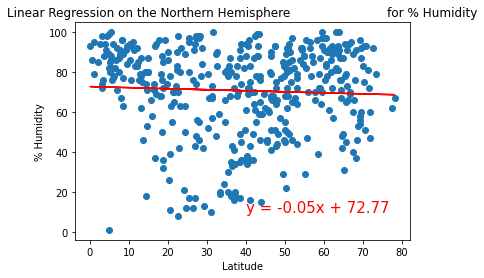

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

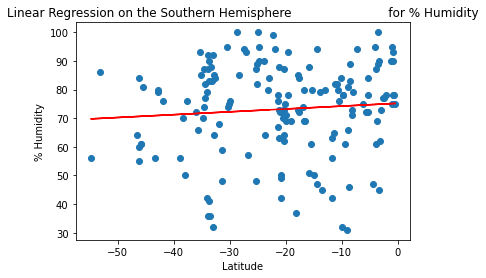

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

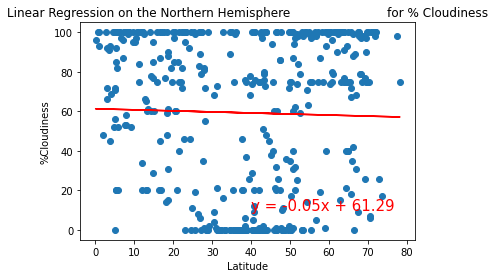

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '%Cloudiness',(40,10))

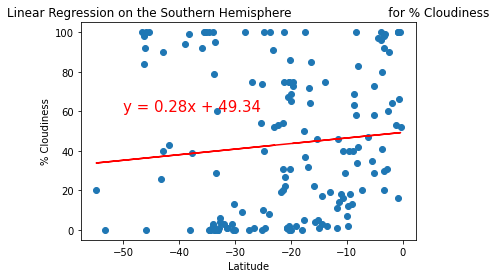

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

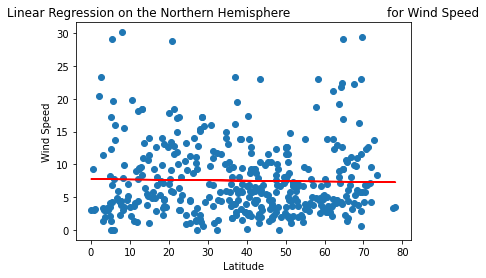

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

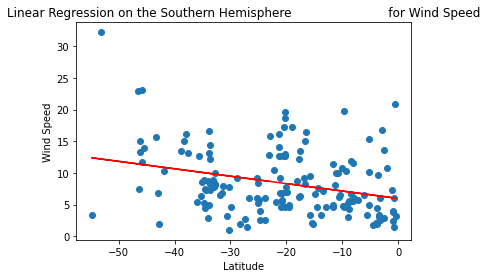

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [67]:
###### Some of the graphs are showing the "y =" math, others are not.
###### I can't figure out why or what the pattern is.